# Business Context
In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to swiftly and effectively respond to customer input not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships.
As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.
While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously.
One of the most effective strategies at your disposal as an organization is to harness the power of automated Support Ticket Categorization - done in the modern day using Large Language Models and Generative AI.


**Objective**

Develop a Generative AI application using a Large Language Model to automate the classification and processing of support tickets. The application will aim to predict ticket categories, assign priority, suggest estimated resolution times, and store the results in a structured DataFrame.

In [ ]:
# Importing Key Libraries

import numpy as np

import pandas as pd

#

import warnings; warnings.simplefilter('ignore')

#
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

#
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import random
random.seed(0)

pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the csv file
data = pd.read_csv('/content/drive/MyDrive/NLP_Project/support_ticket_data.csv')

In [ ]:
#Printing the first 5 rows of the dataframe
data.head()

,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."


In [ ]:
#Printing the shape of the dataframe
data.shape

(21, 2)

In [ ]:
#Checking for null values
data.isnull().sum()

support_tick_id        0
support_ticket_text    0
dtype: int64

**No null fields in the dataset**

In [ ]:
#Checking for duplicate values
data.duplicated().sum()

0

**No Duplicates**

In [ ]:
# Installing GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.45 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 146.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 211.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 165.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 327.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nv

In [ ]:
# For downloading the models from HF Hub
!pip install huggingface_hub==0.20.3 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 kB 9.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.41.0 requires huggingface-hub<1.0,>=0.23.0, but you have huggingface-hub 0.20.3 which is incompatible.


In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama
# Importing the json module
import json

# for time computations
import time

**Loading the model**

In [ ]:
## Model configuration
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf"
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
    )

llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

**Configuring Model parameters**

In [ ]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2,  # CPU cores
    n_batch=512,  # batch size.
    n_gpu_layers=43,  # Number of layers to be executed on GPU
    n_ctx=4096,  # Context window
)

llama_model_loader: loaded meta data with 19 key-value pairs and 363 tensors from /root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGUF/snapshots/4458acc949de0a9914c3eab623904d4fe999050a/llama-2-13b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 5120
llama_model_loader: - kv   4:                          llama.block_count u32              = 40
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 13824
llama_model_loader: - kv   6:                 llama.rope.dimension_

In [ ]:
#Defining a function to generate ticket category based on the support ticket and user's prompt
def response_1(instruction, ticket):

    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combining the support ticket and user_prompt to create the prompt
    prompt = f"Support Ticket: {ticket}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt, # Final prompt to the model
        max_tokens=1024, # the maximum number of tokens that the model should generate
        temperature=0, # controls the randomness of the generated response
        top_p=0.95, # controls the diversity of the generated response by establishing a cumulative probability cutoff for token selection
        repeat_penalty=1.2, # controls the penalty for repeating tokens in the generated response
        top_k=50, # controls the maximum number of most-likely next tokens to consider
        stop=['INST'], # list of tokens that are used to dynamically stop response generation
        echo=False, # controls whether the input (prompt) to the model should be returned
        seed=42, # specifies a seed value that helps replicate results
    )

    # Extracting the model's response
    response_text = response["choices"][0]["text"]
    return response_text

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

In [ ]:
# creating a copy of the data
data_1 = data.copy()

In [ ]:
#Promt for generating ticket category
prompt_1 = """
    You are given . Please assign a support ticket category in upto three words for the Support Ticket description provided by the user.

    Format the output as a JSON object with a single key-value pair as shown below:
    {"Category": "your_category_prediction"}
    """

In [ ]:
start = time.time()
#Applying the ticket category generation function
data_1['model_response_cat'] = data_1['support_ticket_text'].apply(lambda x: response_1(prompt_1,x))
end = time.time()
print("Time taken ",(end-start))


llama_print_timings:        load time =     669.84 ms
llama_print_timings:      sample time =      10.67 ms /    19 runs   (    0.56 ms per token,  1781.03 tokens per second)
llama_print_timings: prompt eval time =     669.48 ms /   149 tokens (    4.49 ms per token,   222.56 tokens per second)
llama_print_timings:        eval time =     935.20 ms /    18 runs   (   51.96 ms per token,    19.25 tokens per second)
llama_print_timings:       total time =    1667.73 ms /   167 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     669.84 ms
llama_print_timings:      sample time =       7.17 ms /    12 runs   (    0.60 ms per token,  1674.81 tokens per second)
llama_print_timings: prompt eval time =     466.35 ms /   143 tokens (    3.26 ms per token,   306.64 tokens per second)
llama_print_timings:        eval time =     616.44 ms /    11 runs   (   56.04 ms per token,    17.84 tokens per second)
llama_print_timings:       total time =    1130.63 ms /   154 

Time taken  26.363519430160522


In [ ]:
#Printing the model's raw response
data_1['model_response_cat']

0     \n    {\n    "Category": "Internet Connectivit...
1                      { "Category": "Hardware Issue" }
2                     \n{ "Category": "Data Recovery" }
3     \n    {\n    "Category": "Wi-Fi Signal Issues"...
4                     \n{ "Category": "Battery Issue" }
5                    \n{ "Category": "Password Reset" }
6                \n{ "Category": "Performance Issues" }
7                      { "Category": "Hardware Issue" }
8                     \n{ "Category": "Data Recovery" }
9                    \n{ "Category": "Hardware Issue" }
10                    \n{ "Category": "Data Recovery" }
11                     { "Category": "Hardware Issue" }
12                     \n{ "Category": "Water Damage" }
13                  \n{ "Category": "Physical Damage" }
14                   \n{ "Category": "Hardware Issue" }
15       \n{ "Category": "Internet Connection Issues" }
16    \n    Sure! Based on the description provided,...
17                    \n{ "Category": "Data Reco

In [ ]:
#Parsing the JSON data from the model's response
data_1['model_response_cat_parsed'] = data_1['model_response_cat'].apply(extract_json_data)
data_1['model_response_cat_parsed'].head()

0    {'Category': 'Internet Connectivity Issues'}
1                  {'Category': 'Hardware Issue'}
2                   {'Category': 'Data Recovery'}
3             {'Category': 'Wi-Fi Signal Issues'}
4                   {'Category': 'Battery Issue'}
Name: model_response_cat_parsed, dtype: object

In [ ]:
#Parsing the value field from the JSON key value pair
data_1['Category']=pd.json_normalize(data_1['model_response_cat_parsed'])

In [ ]:
#Dropping the unwanted columns
data_1.drop(columns=['model_response_cat','model_response_cat_parsed'], inplace=True)

In [ ]:
data_1['Category']

0     Internet Connectivity Issues
1                   Hardware Issue
2                    Data Recovery
3              Wi-Fi Signal Issues
4                    Battery Issue
5                   Password Reset
6               Performance Issues
7                   Hardware Issue
8                    Data Recovery
9                   Hardware Issue
10                   Data Recovery
11                  Hardware Issue
12                    Water Damage
13                 Physical Damage
14                  Hardware Issue
15      Internet Connection Issues
16                    Wi-Fi Issues
17                   Data Recovery
18                   Data Recovery
19           Internet Connectivity
20                  Software Issue
Name: Category, dtype: object

In [ ]:
data_1['Category'].nunique()

13

In [ ]:
#Defining a function to generate ticket tags based on the support ticket, ticket category and user's prompt
def response_2(instruction, ticket,category):

    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combining the support ticket, category and user_prompt to create the prompt
    prompt = f"Support Ticket: {ticket}\nCategory: {category}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt, # Final prompt to the model
        max_tokens=1024, # the maximum number of tokens that the model should generate
        temperature=0, # controls the randomness of the generated response
        top_p=0.95, # controls the diversity of the generated response by establishing a cumulative probability cutoff for token selection
        repeat_penalty=1.2, # controls the penalty for repeating tokens in the generated response
        top_k=50, # controls the maximum number of most-likely next tokens to consider
        stop=['INST'], # list of tokens that are used to dynamically stop response generation
        echo=False, # controls whether the input (prompt) to the model should be returned
        seed=42, # specifies a seed value that helps replicate results
    )

    # Extracting the model's response
    response_text = response["choices"][0]["text"]
    return response_text

In [ ]:
#Promt for generating ticket tags
prompt_2 = """
    You are an AI analyzing support tickets. You are given support ticket description and the assigned category.
    Please tag the issues faced by the user from the ticket description and category provided.

    In case multiple issues are identified, prepare a comma separated list and assign it as a value to the key "Tag".
    In case issues cannot be identified, set "No Tags" (including quotes) for the corresponding JSON key value.
    Format the output as a JSON object with only one key-value pair as shown below. :
    {"Tag": "your_tag_prediction_1, your_tag_prediction_2, your_tag_prediction_3"}

    """

In [ ]:
start = time.time()
#Applying the ticket tags generation function
data_1['model_response_tag'] = data_1[['support_ticket_text','Category']].apply(lambda x: response_2(prompt_2,x[0],x[1]),axis=1)
end = time.time()
print("Time taken ",(end-start))

Llama.generate: prefix-match hit

llama_print_timings:        load time =     669.84 ms
llama_print_timings:      sample time =      78.78 ms /   126 runs   (    0.63 ms per token,  1599.45 tokens per second)
llama_print_timings: prompt eval time =     533.17 ms /   232 tokens (    2.30 ms per token,   435.13 tokens per second)
llama_print_timings:        eval time =    7040.10 ms /   125 runs   (   56.32 ms per token,    17.76 tokens per second)
llama_print_timings:       total time =    8102.25 ms /   357 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     669.84 ms
llama_print_timings:      sample time =      58.37 ms /    99 runs   (    0.59 ms per token,  1696.22 tokens per second)
llama_print_timings: prompt eval time =     553.20 ms /   229 tokens (    2.42 ms per token,   413.95 tokens per second)
llama_print_timings:        eval time =    5576.02 ms /    98 runs   (   56.90 ms per token,    17.58 tokens per second)
llama_print_timings:       to

Time taken  147.21906876564026


In [ ]:
#Printing the model's raw response
data_1['model_response_tag']

0     \n    Sure! Here's my analysis of the support ...
1     \n    Sure, I can do that! Based on the suppor...
2     \n    Sure! Here is the JSON object based on t...
3     \n    Sure! Here's the JSON object based on th...
4     \n    Sure! Here's the JSON object based on th...
5     \n    Sure, I can help you with that! Based on...
6     \n    Sure! Here's the JSON object based on th...
7      Sure! Here is the JSON object based on the in...
8     \n    Sure, I can help you with that! Based on...
9     \n    Sure! Here's the JSON object based on th...
10    \n    Sure, I'd be happy to help! Based on the...
11    \n    Sure! Here is the JSON object based on t...
12    \n    Sure! Here is the JSON object based on t...
13    \n    Sure! Here's the JSON object based on th...
14    \n    Sure! Here's the JSON object for the giv...
15    \n    Sure! Here's the JSON object based on th...
16    \n    Sure, I'd be happy to help! Based on the...
17    \n    Sure, I'd be happy to help! Based on

In [ ]:
data_1['model_response_tag'][0]

'\n    Sure! Here\'s my analysis of the support ticket based on its description and category:\n    \n    {"Tag": "Internet Connectivity Issues, Disconnections"}\n    \n    Based on the description of frequent disconnections and a significant slowdown of the internet connection over the past two days, I have identified the following issues:\n    \n    - Internet Connectivity Issues\n    - Disconnections\n    \n    These issues are likely related to each other and may be caused by a variety of factors such as network congestion, ISP issues, or hardware problems.'

In [ ]:
#Parsing the JSON data from the model's response
data_1['model_response_tag_parsed'] = data_1['model_response_tag'].apply(extract_json_data)
data_1['model_response_tag_parsed'].head(20)

0     {'Tag': 'Internet Connectivity Issues, Disconn...
1     {'Tag': 'Hardware Failure, Urgent Assistance R...
2                {'Tag': 'Data Loss, Priority Request'}
3     {'Tag': 'Weak Wi-Fi Signal, Troubleshooting Is...
4             {'Tag': 'Battery Drain, Rapid Discharge'}
5     {'Tag': 'urgent transaction, password reset, l...
6          {'Tag': 'performance_issues, slow_computer'}
7          {'Tag': 'blue_screen_error, hardware_issue'}
8             {'Tag': 'Data Recovery, Hardware Issues'}
9     {'Tag': 'Hardware Issue, Graphics Card Malfunc...
10                 {'Tag': 'Data Loss, File Retrieval'}
11              {'Tag': 'Hardware Issue, Black Screen'}
12               {'Tag': 'Water Damage, Data Recovery'}
13            {'Tag': 'Physical Damage, File Recovery'}
14            {'Tag': 'hardware_issue, touchpad_issue'}
15    {'Tag': 'InternetConnectionDropouts, WorkInter...
16    {'Tag': 'Wi-Fi consistency, connectivity issue...
17          {'Tag': 'Data Recovery, Accidental F

In [ ]:
#Parsing the value field from the JSON key value pair
data_1['Tag']=pd.json_normalize(data_1['model_response_tag_parsed'])

In [ ]:
#Dropping the unwanted columns
data_1.drop(columns=['model_response_tag','model_response_tag_parsed'], inplace=True)

In [ ]:
data_1['Tag']

0          Internet Connectivity Issues, Disconnections
1          Hardware Failure, Urgent Assistance Required
2                           Data Loss, Priority Request
3             Weak Wi-Fi Signal, Troubleshooting Issues
4                        Battery Drain, Rapid Discharge
5           urgent transaction, password reset, lockout
6                     performance_issues, slow_computer
7                     blue_screen_error, hardware_issue
8                        Data Recovery, Hardware Issues
9             Hardware Issue, Graphics Card Malfunction
10                            Data Loss, File Retrieval
11                         Hardware Issue, Black Screen
12                          Water Damage, Data Recovery
13                       Physical Damage, File Recovery
14                       hardware_issue, touchpad_issue
15         InternetConnectionDropouts, WorkInterruption
16    Wi-Fi consistency, connectivity issues, work p...
17                     Data Recovery, Accidental

In [ ]:
#Defining a function to generate ticket priority based on the support ticket, ticket category, ticket tag and user's prompt
def response_3(instruction, ticket,category,tag):

    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combining the support ticket, category, tags and user_prompt to create the prompt
    prompt = f"Support Ticket: {ticket}\nCategory: {category}\nTag:{tag}\n{system_message}"

    response = lcpp_llm(
        prompt=prompt, # Final prompt to the model
        max_tokens=1024, # the maximum number of tokens that the model should generate
        temperature=0, # controls the randomness of the generated response
        top_p=0.95, # controls the diversity of the generated response by establishing a cumulative probability cutoff for token selection
        repeat_penalty=1.2, # controls the penalty for repeating tokens in the generated response
        top_k=50, # controls the maximum number of most-likely next tokens to consider
        stop=['INST'], # list of tokens that are used to dynamically stop response generation
        echo=False, # controls whether the input (prompt) to the model should be returned
        seed=42, # specifies a seed value that helps replicate results
    )

    # Extracting the model's response
    response_text = response["choices"][0]["text"]
    return response_text

In [ ]:
#Promt for generating ticket priority
prompt_3 = """
    You are an AI analyzing support tickets. You are given support ticket description, category and the tags assigned for the issue.
    Based on these classify the priority of the ticket into the following categories:
    - High
    - Medium
    - Low

    In case priority cannot be assigned, return "Not Applicable" (including quotes) for the corresponding JSON key value.
    Format the output as a JSON object with a single key-value pair as shown below:
    {"priority": "your_priority_prediction"}

    """

start = time.time()
#Applying the ticket priority generation function
data_1['model_response_priority'] = data_1[['support_ticket_text','Category','Tag']].apply(lambda x: response_3(prompt_3,x[0],x[1],x[2]),axis=1)
end = time.time()
print("Time taken ",(end-start))

Llama.generate: prefix-match hit

llama_print_timings:        load time =     669.84 ms
llama_print_timings:      sample time =      82.68 ms /   132 runs   (    0.63 ms per token,  1596.59 tokens per second)
llama_print_timings: prompt eval time =     654.33 ms /   218 tokens (    3.00 ms per token,   333.16 tokens per second)
llama_print_timings:        eval time =    9960.12 ms /   131 runs   (   76.03 ms per token,    13.15 tokens per second)
llama_print_timings:       total time =   11156.80 ms /   349 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     669.84 ms
llama_print_timings:      sample time =       9.80 ms /    16 runs   (    0.61 ms per token,  1632.49 tokens per second)
llama_print_timings: prompt eval time =     731.76 ms /   218 tokens (    3.36 ms per token,   297.91 tokens per second)
llama_print_timings:        eval time =    1148.70 ms /    15 runs   (   76.58 ms per token,    13.06 tokens per second)
llama_print_timings:       to

Time taken  208.96314239501953


In [ ]:
#Printing the model's raw response
data_1['model_response_priority'][0]

' Sure! I\'d be happy to help classify the priority of the support ticket based on the information provided. Here\'s my analysis:\n\nBased on the description of the ticket, the frequency of disconnections and the significant slowdown of the internet connection suggest a critical impact on the user\'s ability to work efficiently. The tags assigned to the ticket also indicate that this is an internet connectivity issue. Considering these factors, I would classify the priority of this ticket as "High".\n\nHere\'s my output as a JSON object with a single key-value pair:\n{"priority": "High"}'

In [ ]:
#Parsing the JSON data from the model's response
data_1['model_response_priority_parsed'] = data_1['model_response_priority'].apply(extract_json_data)
data_1['model_response_priority_parsed'].head()

0      {'priority': 'High'}
1      {'priority': 'High'}
2      {'priority': 'High'}
3    {'priority': 'Medium'}
4    {'priority': 'Medium'}
Name: model_response_priority_parsed, dtype: object

In [ ]:
#Parsing the value field from the JSON key value pair
data_1['Priority']=pd.json_normalize(data_1['model_response_priority_parsed'])

In [ ]:
data_1['Priority']

0       High
1       High
2       High
3     Medium
4     Medium
5       High
6     Medium
7     Medium
8     Medium
9       High
10    Medium
11      High
12    Medium
13    Medium
14    Medium
15      High
16    Medium
17    Medium
18    Medium
19      High
20    Medium
Name: Priority, dtype: object

In [ ]:
#Dropping the unwanted columns
data_1.drop(columns=['model_response_priority','model_response_priority_parsed'], inplace=True)

In [ ]:
#Defining a function to generate ticket ETA based on the support ticket, ticket category, ticket tag, priority and user's prompt
def response_4(instruction, ticket,category,tag,priority):

    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combining the support ticket, category, tags, priority and user_prompt to create the prompt
    prompt = f"Support Ticket: {ticket}\nCategory: {category}\nTag:{tag}\nPriority: {priority}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt, # Final prompt to the model
        max_tokens=1024, # the maximum number of tokens that the model should generate
        temperature=0, # controls the randomness of the generated response
        top_p=0.95, # controls the diversity of the generated response by establishing a cumulative probability cutoff for token selection
        repeat_penalty=1.2, # controls the penalty for repeating tokens in the generated response
        top_k=50, # controls the maximum number of most-likely next tokens to consider
        stop=['INST'], # list of tokens that are used to dynamically stop response generation
        echo=False, # controls whether the input (prompt) to the model should be returned
        seed=42, # specifies a seed value that helps replicate results
    )

    # Extracting the model's response
    response_text = response["choices"][0]["text"]
    return response_text

In [ ]:
#Promt for generating ticket ETA
prompt_4 = """
    You are an AI analyzing support tickets.
    ETA needs to be assigned for the ticket, based on the given support ticket description, category, tags assigned for the issue and the assigned priority.
    The ETA for the tickets can be one of the following:
    - Immediate
    - 6-12 Hours
    - 12-24 Hours
    - 1-2 Business Days
    - 2-4 Business Days

    Format the output as a JSON object with a single key-value pair as shown below. In case ETA is not identified, return "No ETA" (including quotes) for the corresponding JSON key value.:
    {"ETA": "your_ETA_prediction"}

    """

start = time.time()
#Applying the ticket ETA generation function
data_1['model_response_ETA'] = data_1[['support_ticket_text','Category','Tag','Priority']].apply(lambda x: response_4(prompt_4,x[0],x[1],x[2],x[3]),axis=1)
end = time.time()
print("Time taken ",(end-start))

Llama.generate: prefix-match hit

llama_print_timings:        load time =     669.84 ms
llama_print_timings:      sample time =     121.60 ms /   193 runs   (    0.63 ms per token,  1587.17 tokens per second)
llama_print_timings: prompt eval time =     802.74 ms /   267 tokens (    3.01 ms per token,   332.61 tokens per second)
llama_print_timings:        eval time =   14103.62 ms /   192 runs   (   73.46 ms per token,    13.61 tokens per second)
llama_print_timings:       total time =   15737.01 ms /   459 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     669.84 ms
llama_print_timings:      sample time =     141.30 ms /   226 runs   (    0.63 ms per token,  1599.41 tokens per second)
llama_print_timings: prompt eval time =     846.63 ms /   267 tokens (    3.17 ms per token,   315.37 tokens per second)
llama_print_timings:        eval time =   16442.73 ms /   225 runs   (   73.08 ms per token,    13.68 tokens per second)
llama_print_timings:       to

Time taken  237.4162015914917


In [ ]:
#Printing the model's raw response
data_1['model_response_ETA']

0     \n    Based on the given support ticket descri...
1     \n    Based on the given support ticket descri...
2     \n    Based on the given support ticket descri...
3     \n    Based on the provided support ticket des...
4     \n    Based on the provided support ticket des...
5     \n    Based on the given support ticket descri...
6     \n    Based on the provided support ticket des...
7     \n    Based on the provided support ticket des...
8     \n    Based on the given support ticket descri...
9     \n    Based on the given support ticket descri...
10             \n    {\n    "ETA": "12-24 Hours"\n    }
11    \n    Based on the given support ticket descri...
12    \n    Based on the given support ticket descri...
13    \n    Based on the provided support ticket des...
14    \n    Based on the given support ticket descri...
15    \n    Based on the given support ticket descri...
16    \n    Based on the given support ticket descri...
17           \n    {\n     "ETA": "12-24 Hours"\

In [ ]:
#Parsing the JSON data from the model's response
data_1['model_response_ETA_parsed'] = data_1['model_response_ETA'].apply(extract_json_data)
data_1['model_response_ETA_parsed'].head()

0    {'ETA': '12-24 Hours'}
1      {'ETA': 'Immediate'}
2      {'ETA': 'Immediate'}
3    {'ETA': '12-24 Hours'}
4    {'ETA': '12-24 Hours'}
Name: model_response_ETA_parsed, dtype: object

In [ ]:
#Parsing the value field from the JSON key value pair
data_1['ETA']=pd.json_normalize(data_1['model_response_ETA_parsed'])

In [ ]:
data_1['ETA']

0     12-24 Hours
1       Immediate
2       Immediate
3     12-24 Hours
4     12-24 Hours
5     12-24 Hours
6     12-24 Hours
7     12-24 Hours
8     12-24 Hours
9     12-24 Hours
10    12-24 Hours
11    12-24 Hours
12    12-24 Hours
13    12-24 Hours
14    12-24 Hours
15    12-24 Hours
16     6-12 hours
17    12-24 Hours
18    12-24 Hours
19    12-24 Hours
20    12-24 Hours
Name: ETA, dtype: object

In [ ]:
#Dropping the unwanted columns
data_1.drop(columns=['model_response_ETA','model_response_ETA_parsed'], inplace=True)

In [ ]:
#Defining a function to generate response to be sent based on the support ticket, ticket category, ticket tag, priority, ETA and user's prompt
def response_5(instruction, ticket,category,tag,priority,eta):

    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combining the support ticket, category, tags, priority and user_prompt to create the prompt
    prompt = f"Support Ticket: {ticket}\nCategory: {category}\nTag:{tag}\nPriority: {priority}\nETA: {eta}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt, # Final prompt to the model
        max_tokens=1024, # the maximum number of tokens that the model should generate
        temperature=0, # controls the randomness of the generated response
        top_p=0.95, # controls the diversity of the generated response by establishing a cumulative probability cutoff for token selection
        repeat_penalty=1.2, # controls the penalty for repeating tokens in the generated response
        top_k=50, # controls the maximum number of most-likely next tokens to consider
        stop=['INST'], # list of tokens that are used to dynamically stop response generation
        echo=False, # controls whether the input (prompt) to the model should be returned
        seed=42, # specifies a seed value that helps replicate results
    )

    # Extracting the model's response
    response_text = response["choices"][0]["text"]
    return response_text

In [ ]:
#Promt for generating ticket response
prompt_5 = """
    You are an AI analyzing support tickets. Response for the support ticket needs to be sent to the user based on the given support ticket description, category, tags assigned for the issue, assigned priority and ETA for resolution.
    Please generate the response to be sent for the support ticket to the user.

    Generate the response in a single line without any new line characters.
    Format the output as a JSON object with a single key-value pair as shown below:
    {"Response": "the_generated_response"}

    """

start = time.time()
#Applying the ticket response generation function
data_1['model_response_resp'] = data_1[['support_ticket_text','Category','Tag','Priority','ETA']].apply(lambda x: response_5(prompt_5,x[0],x[1],x[2],x[3],x[4]),axis=1)
end = time.time()
print("Time taken ",(end-start))

Llama.generate: prefix-match hit

llama_print_timings:        load time =     669.84 ms
llama_print_timings:      sample time =      77.06 ms /   122 runs   (    0.63 ms per token,  1583.12 tokens per second)
llama_print_timings: prompt eval time =     692.53 ms /   228 tokens (    3.04 ms per token,   329.23 tokens per second)
llama_print_timings:        eval time =    9345.12 ms /   121 runs   (   77.23 ms per token,    12.95 tokens per second)
llama_print_timings:       total time =   10544.28 ms /   349 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     669.84 ms
llama_print_timings:      sample time =      64.43 ms /   106 runs   (    0.61 ms per token,  1645.27 tokens per second)
llama_print_timings: prompt eval time =     752.19 ms /   222 tokens (    3.39 ms per token,   295.14 tokens per second)
llama_print_timings:        eval time =    8127.57 ms /   105 runs   (   77.41 ms per token,    12.92 tokens per second)
llama_print_timings:       to

Time taken  202.4249885082245


In [ ]:
#Parsing the JSON data from the model's response
data_1['model_response_resp_parsed'] = data_1['model_response_resp'].apply(extract_json_data)
data_1['model_response_resp_parsed'].head()

0    {'Response': 'We apologize for the inconvenien...
1    {'Response': 'I apologize for the inconvenienc...
2    {'Response': 'We apologize for the inconvenien...
3    {'Response': 'Thank you for reaching out to us...
4    {'Response': 'Thank you for reaching out to us...
Name: model_response_resp_parsed, dtype: object

In [ ]:
data_1['model_response_resp'][4]

' {"Response": "Thank you for reaching out to us! We\'re here to help you resolve the battery drain issue on your smartphone. Based on the information provided, we\'ve assigned a medium priority to your ticket (ETA: 12-24 hours). Our team will start investigating the matter and provide a solution as soon as possible."}'

In [ ]:
#Parsing the value field from the JSON key value pair
data_1['Response']=pd.json_normalize(data_1['model_response_resp_parsed'])

In [ ]:
data_1['Response']

0     We apologize for the inconvenience caused by t...
1     I apologize for the inconvenience you are faci...
2     We apologize for the inconvenience caused by t...
3     Thank you for reaching out to us regarding you...
4     Thank you for reaching out to us! We're here t...
5     We apologize for the inconvenience! We have re...
6     Thank you for reaching out! Based on the infor...
7     Thank you for reaching out to us! We apologize...
8     Thank you for reaching out to us! We understan...
9     Thank you for reaching out to us! We're sorry ...
10    We understand the urgency of your situation an...
11    We apologize for the inconvenience you are fac...
12    Sorry to hear that you accidentally spilled wa...
13    Thank you for reaching out to us! We understan...
14    Thank you for reaching out to us! We're sorry ...
15    We apologize for the inconvenience caused by t...
16    Dear [User], we apologize for the inconvenienc...
17    We understand the urgency of the situation

In [ ]:
data_1['Response'][0]

"We apologize for the inconvenience caused by the slow internet speeds and frequent disconnections you're experiencing. Our team is working diligently to resolve the issue as soon as possible. We have escalated the matter to our network operations team and they are currently investigating the cause of the problem. We will keep you updated on the progress and aim to resolve the issue within the next 12-24 hours. In the meantime, you may experience some intermittent connectivity issues. Thank you for your patience and understanding."

In [ ]:
#Dropping the unwanted columns
data_1.drop(columns=['model_response_resp','model_response_resp_parsed'], inplace=True)

In [ ]:
#Printing the final dataframe
data_1

,support_tick_id,support_ticket_text,Category,Tag,Priority,ETA,Response
0,ST2023-006,My internet connection has significantly slowe...,Internet Connectivity Issues,"Internet Connectivity Issues, Disconnections",High,12-24 Hours,We apologize for the inconvenience caused by t...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issue,"Hardware Failure, Urgent Assistance Required",High,Immediate,I apologize for the inconvenience you are faci...
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"Data Loss, Priority Request",High,Immediate,We apologize for the inconvenience caused by t...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Wi-Fi Signal Issues,"Weak Wi-Fi Signal, Troubleshooting Issues",Medium,12-24 Hours,Thank you for reaching out to us regarding you...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Battery Issue,"Battery Drain, Rapid Discharge",Medium,12-24 Hours,Thank you for reaching out to us! We're here t...
5,ST2023-011,I'm locked out of my online banking account an...,Password Reset,"urgent transaction, password reset, lockout",High,12-24 Hours,We apologize for the inconvenience! We have re...
6,ST2023-012,"My computer's performance is sluggish, severel...",Performance Issues,"performance_issues, slow_computer",Medium,12-24 Hours,Thank you for reaching out! Based on the infor...
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware Issue,"blue_screen_error, hardware_issue",Medium,12-24 Hours,Thank you for reaching out to us! We apologize...
8,ST2023-014,My external hard drive isn't being recognized ...,Data Recovery,"Data Recovery, Hardware Issues",Medium,12-24 Hours,Thank you for reaching out to us! We understan...
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware Issue,"Hardware Issue, Graphics Card Malfunction",High,12-24 Hours,Thank you for reaching out to us! We're sorry ...


In [ ]:
#Saving the final dataframe in csv format
data_1.to_csv('/content/drive/MyDrive/NLP_Project/final_support_ticket_data.csv')

### Univariate Analysis

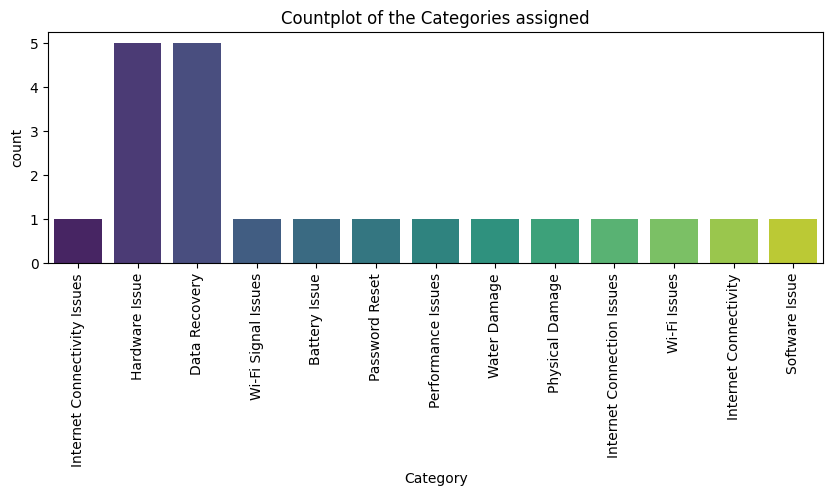

In [ ]:
#Plotting the countplot for the categories assigned by the model
plt.figure(figsize=(10,3));
sns.countplot(data=data_1,x='Category', palette='viridis');
plt.title('Countplot of the Categories assigned');
plt.xticks(rotation=90);

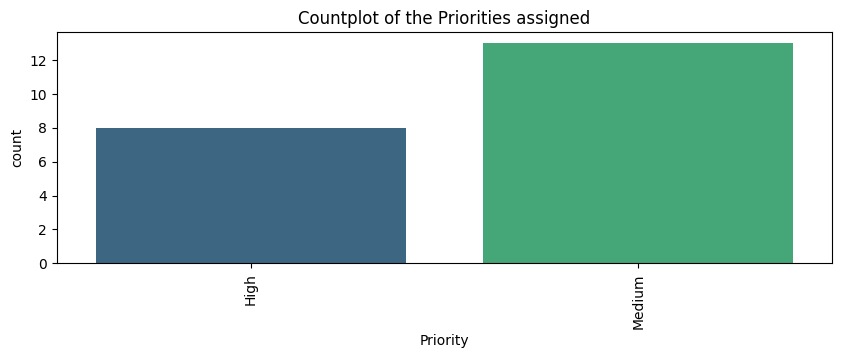

In [ ]:
#Plotting the countplot for the priorities assigned by the model
plt.figure(figsize=(10,3));
sns.countplot(data=data_1,x='Priority', palette='viridis');
plt.title('Countplot of the Priorities assigned');
plt.xticks(rotation=90);

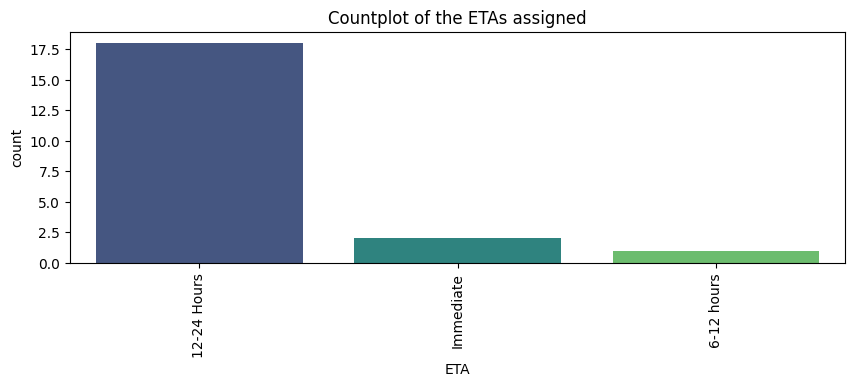

In [ ]:
#Plotting the countplot for the ETAs assigned by the model
plt.figure(figsize=(10,3));
sns.countplot(data=data_1,x='ETA', palette='viridis');
plt.title('Countplot of the ETAs assigned');
plt.xticks(rotation=90);

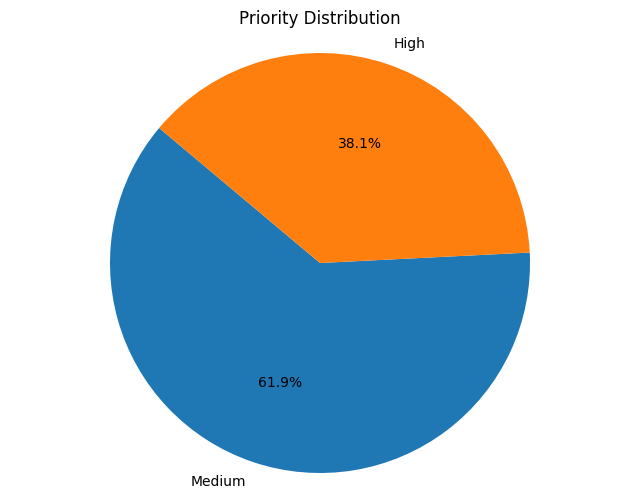

In [ ]:
#Plotting the pie-chart for the priorities distribution
priority_counts = data_1['Priority'].value_counts()

plt.figure(figsize=(8, 6));
plt.pie(priority_counts, labels=priority_counts.index, autopct='%1.1f%%', startangle=140);
plt.title('Priority Distribution');
plt.axis('equal');
plt.show();

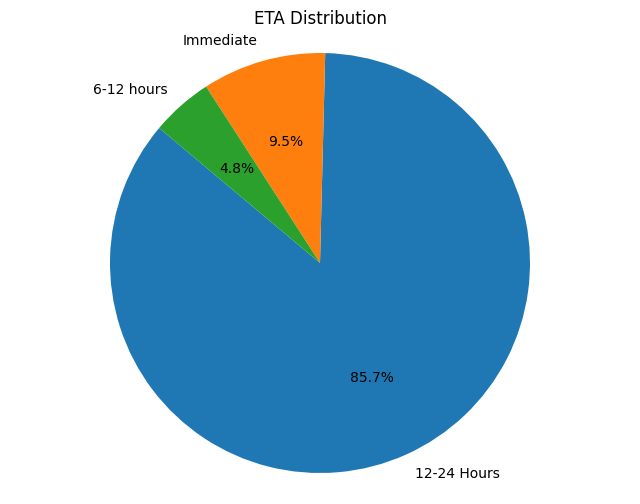

In [ ]:
#Plotting the pie-chart for the ETAs distribution
ETA_counts = data_1['ETA'].value_counts()

plt.figure(figsize=(8, 6));
plt.pie(ETA_counts, labels=ETA_counts.index, autopct='%1.1f%%', startangle=140);
plt.title('ETA Distribution');
plt.axis('equal');
plt.show();

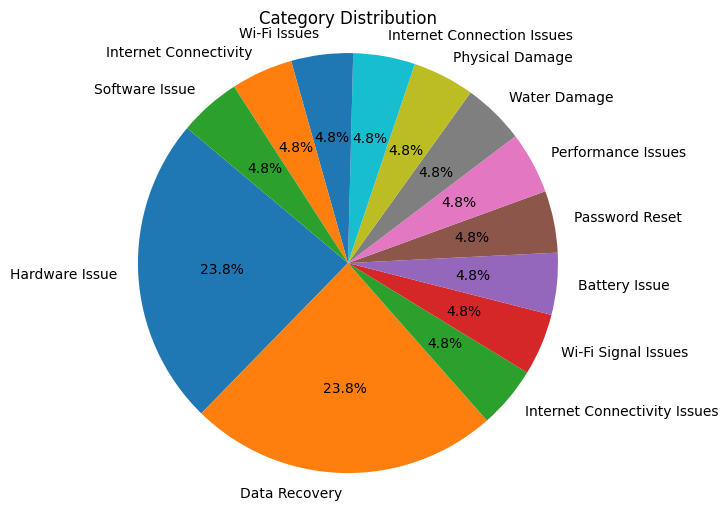

In [ ]:
#Plotting the pie-chart for the categories distribution
Cat_counts = data_1['Category'].value_counts()

plt.figure(figsize=(8, 6));
plt.pie(Cat_counts, labels=Cat_counts.index, autopct='%1.1f%%', startangle=140);
plt.title('Category Distribution');
plt.axis('equal');
plt.show();

**Observations from the Univariate Analysis**
- The model has identified most of the issues under the categories Hardware or Data Recovery related issues
- The identified categories are quite accurate as identified by manually reviewing the issues
- There are however some issues which can be clubbed together, but are are categorized separately. For example, Internet Connectivity Issues, Internet Connection Issues, Internet Connectivity can be clubbed as one category
- The identified Tags are also accurate and can be used to group the issues
- All the issues have been assigned either High or Medium Priority. Maybe specifying conditions for assigning High/Medium/Low priority can help the model determine appropriate priorities
- The assigned ETAs are also either Immediate, 6-12 Hours and 12-24 Hours, with most being 12-24 Hpurs. For this as well specifying conditions for assigning ETA might help


# Conclusion

Based on this exercise it can be concluded that LLMs can help automate alot of manual and tiresome work and improve the efficiency and turnaround time for companies. Summarizing my observations and recommendations below:

**Observations**
- LLMs like Llama and Mistral are good at deciphering the context of the given text.
- They can understand the given issue and classify then into categories, assign priorities and ETAs and also generate appropriate responses to be sent towards the customers
- They can also format the output in the specified format, like JSON, which makes it easier to extract the text, which further helps in automating the tasks
- The responses generated by LLMs are very realistic, as if written by a human beings
- The prompts for the model should be very clear and unambiguous for the model to provide good and correct response. If the prompts are not clear or specific, then the responses are not accurate

**Recommendations**
- Businesses can utilize LLMs to automate many manual tasks, which can improve the efficiency and the response time
- The business process can be streamlined as well, by utilizing the outputs from the LLMs. For example, using the categories and tags the support tickets can be routed to appropriate departments and using the priorities and ETAs the support team can plan for resolving the issues
- On the flipside, the prompts used for the LLM should be crisp and clear, without any ambiguity in the task to be performed. This requires excellent Prompt Engineering skills to be employed by the businesses
- Another aspect is the cost of operating LLMs. LLMs require GPUs to run and execute tasks. If Continuous issue monitoring is needed, then the GPUs must be running continuously, which is quite expensive
- Business must also be careful of LLM hallucinations and must plan for high quality prompt engineering and periodic reviews to avoid bad user experience
- Based on the pointers given above, enterprises must weigh-in the cost vs benefit before deploying LLMs for business processes